In [4]:
import pysal as ps
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from libpysal.weights.contiguity import Queen
import libpysal
sns.set_style('white')


In [5]:
from libpysal.examples import load_example
elections = load_example('Elections')

In [6]:
elections.get_file_list()

['/home/ekcarter/pysal_data/Elections/__MACOSX/election/._election.shp',
 '/home/ekcarter/pysal_data/Elections/election/election.dbf',
 '/home/ekcarter/pysal_data/Elections/election/election.prj',
 '/home/ekcarter/pysal_data/Elections/election/election.shp',
 '/home/ekcarter/pysal_data/Elections/election/election.shx']

In [7]:
#geoms = gpd.read_file(ps.examples.get_path('NAT.shp'))

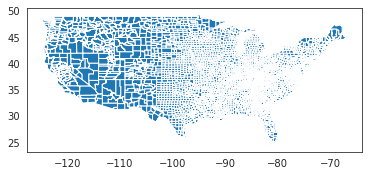

In [8]:
votes = gpd.read_file(elections.get_path('election.shp'))
%matplotlib inline
votes.plot()

In [9]:
votes.head()

,STATEFP,COUNTYFP,GEOID,ALAND,AWATER,area_name,state_abbr,PST045214,PST040210,PST120214,...,total_2012,Demvotes12,GOPvotes12,county_fip,state_fips,pct_dem_12,pct_gop_12,diff_2012,pct_pt_12,geometry
0,01,005,01005,2.291821e+09,50864677.0,Barbour County,AL,26887.0,27457.0,-2.1,...,11459.0,5873.0,5539.0,5.0,1.0,0.512523,0.483376,334.0,0.029147,"POLYGON ((-85.74803 31.61918, -85.74544 31.618..."
1,01,023,01023,2.365955e+09,19059247.0,Choctaw County,AL,13323.0,13858.0,-3.9,...,7965.0,3785.0,4150.0,23.0,1.0,0.475204,0.521030,365.0,-0.045825,"POLYGON ((-88.47323 31.89386, -88.46888 31.930..."
2,01,035,01035,2.201896e+09,6643480.0,Conecuh County,AL,12670.0,13228.0,-4.2,...,7013.0,3551.0,3434.0,35.0,1.0,0.506345,0.489662,117.0,0.016683,"POLYGON ((-87.42720 31.26436, -87.42551 31.268..."
3,01,051,01051,1.601877e+09,99850740.0,Elmore County,AL,80977.0,79296.0,2.1,...,35440.0,8940.0,26223.0,51.0,1.0,0.252257,0.739927,17283.0,-0.487669,"POLYGON ((-86.41333 32.75059, -86.37115 32.750..."
4,01,065,01065,1.667805e+09,32525874.0,Hale County,AL,15184.0,15760.0,-3.7,...,8628.0,5401.0,3205.0,65.0,1.0,0.625985,0.371465,2196.0,0.254520,"POLYGON ((-87.87046 32.76244, -87.86818 32.765..."


In [10]:
print(votes['pct_dem_12'].mean())
print(votes['pct_dem_16'].mean())

0.384501897042472
0.3166674300444024


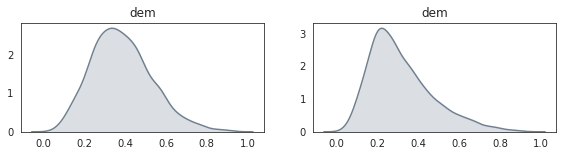

In [11]:
f,ax = plt.subplots(1,2, figsize=(2*3*1.6, 2))
for i,col in enumerate(['pct_dem_12','pct_dem_16']):
    sns.kdeplot(votes[col].values, shade=True, color='slategrey', ax=ax[i])
    ax[i].set_title(col.split('_')[1])

In [12]:
votes.crs = {'init':'epsg:4326'}
votes = votes.to_crs(epsg='5070')

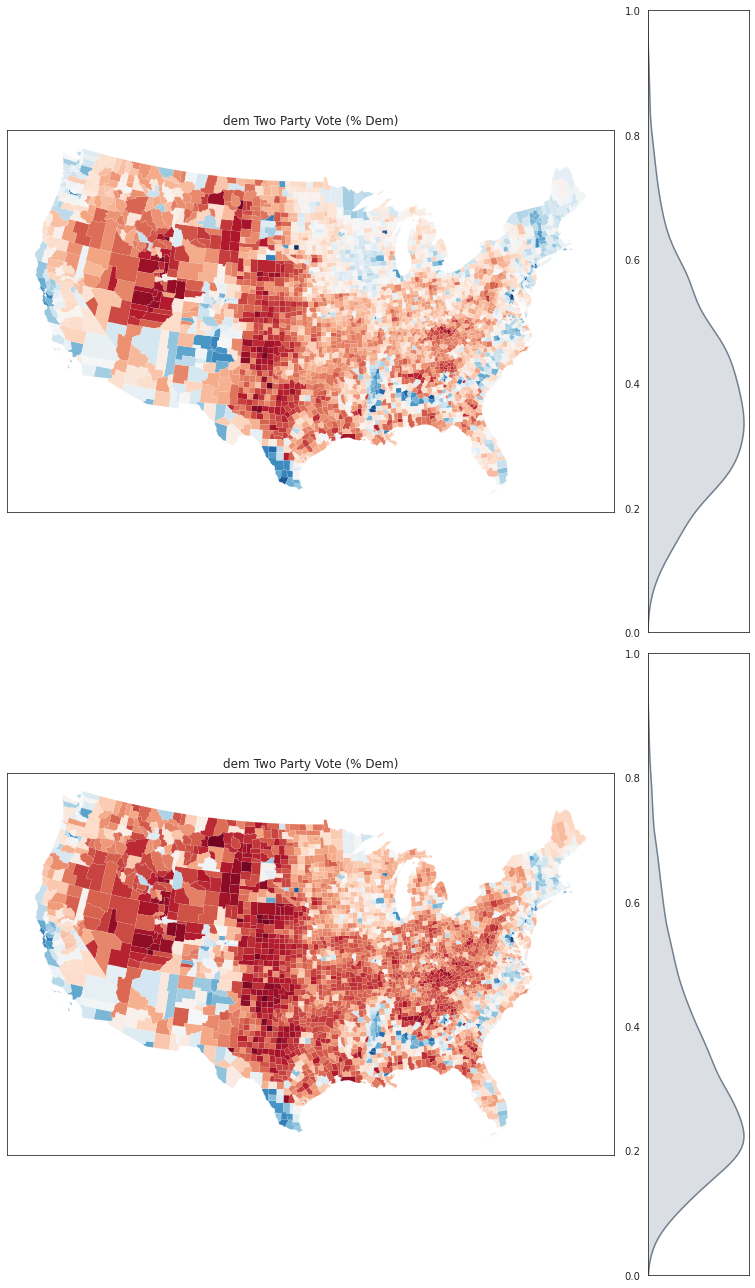

In [13]:
f,ax = plt.subplots(2,2, figsize=(1.6*6 + 1,6*3), gridspec_kw=dict(width_ratios=(6,1)))
for i,col in enumerate(['pct_dem_12','pct_dem_16']):
    votes.plot(col, linewidth=.05, cmap='RdBu', ax=ax[i,0])
    ax[i,0].set_title(col.split('_')[1] + ' Two Party Vote (% Dem)')
    ax[i,0].set_xticklabels('')
    ax[i,0].set_yticklabels('')
    sns.kdeplot(votes[col].values, ax=ax[i,1], vertical=True, shade=True, color='slategrey')
    ax[i,1].set_xticklabels('')
    ax[i,1].set_ylim(0,1)
f.tight_layout()
plt.show()

In [14]:
votes.dropna(subset=['pct_dem_12','pct_dem_16'], inplace=True)

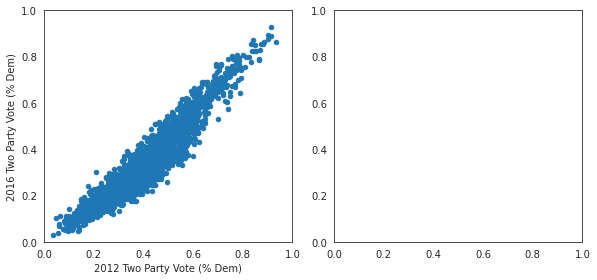

In [16]:
f,ax = plt.subplots(1,2, figsize=(4*2.1,4))
votes[['pct_dem_12','pct_dem_16']].plot.scatter('pct_dem_12','pct_dem_16', ax=ax[0])
ax[0].set_xlabel('2012 Two Party Vote (% Dem)')
ax[0].set_ylabel('2016 Two Party Vote (% Dem)')
ax[0].axis([0,1,0,1])
r = np.corrcoef(votes['pct_dem_12'].values, votes['pct_dem_16'].values)[0,1]

f.tight_layout()
plt.show()

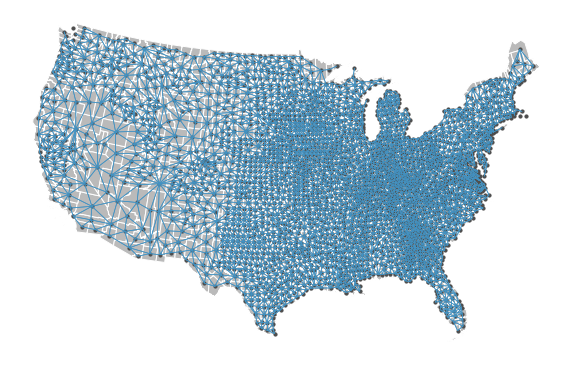

In [18]:
from splot.libpysal import plot_spatial_weights
w = Queen.from_dataframe(votes)
plot_spatial_weights(w, votes)
plt.show()

('WARNING: ', 1267, ' is an island (no neighbors)')
('WARNING: ', 2729, ' is an island (no neighbors)')
('WARNING: ', 2763, ' is an island (no neighbors)')


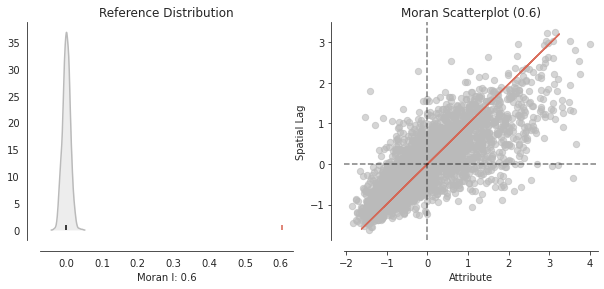

AttributeError: 'numpy.ndarray' object has no attribute 'set_xlabel'

In [22]:
from splot.esda import moran_scatterplot
from splot.esda import plot_moran
from esda.moran import Moran


# calculate Moran and plot
moran = Moran(votes['pct_dem_16'], w=w)
plot_moran(moran, zstandard=True, figsize=(10,4))
plt.show()
ax.set_xlabel('pct_dem_16')
ax.set_ylabel('Spatial Lag of pct_dem_16')
plt.show()

In [23]:
?moran

## TASK: How can we isolate a p-value to validate whether our assumption of normality is true?